<a href="https://colab.research.google.com/github/JeFFich/Math_Programming/blob/main/Prod_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = "/usa1936-50.xls"

Считаем данные из excel файла, заменим названия колонок на более удобные и зафиксируем кол-во строк

In [ ]:
df = pd.read_excel(file_name, header = 1, index_col = 0)
df.rename(columns={"ВВП(млн.$)":"Y", "K(млн.$)":"K", "L(тыс.чел.)":"L"}, inplace=True)
M = df.shape[0]

**Задание 1**

Найдем неизвестные коэффициенты для первой производственной функции (показатели степеней независимы)

In [ ]:
df1 = df.copy()

# Линеаризируем задачу через логарифм
for i in df.columns.to_list():
  df1[f"Ln({i})"] = np.log(df[i])

# Составим систему уравнений на коэффициенты
nec = (df1['Ln(K)'].sum(), df1['Ln(L)'].sum(), df1['Ln(Y)'].sum(), np.dot(df1['Ln(K)'], df1['Ln(K)']).sum(),
       np.dot(df1['Ln(K)'], df1['Ln(L)']).sum(), np.dot(df1['Ln(K)'], df1['Ln(Y)']).sum(), np.dot(df1['Ln(L)'], df1['Ln(L)']).sum(), np.dot(df1['Ln(Y)'], df1['Ln(L)']).sum())
matr = np.array([[M, nec[0], nec[1]], [nec[0], nec[3], nec[4]], [nec[1], nec[4], nec[6]]])
vect = np.array([nec[2], nec[5], nec[7]])

# Решим систему
answ = np.linalg.solve(matr, vect)
answ[0] = np.exp(answ[0])

# Выведем найденные значения
print(f'A = {answ[0]:.4f}, alpha = {answ[1]:.4f}, beta = {answ[2]:.4f}')

# Зафиксируем новые значения ВВП, полученные через ПФ
new_Y = answ[0] * (df1.K ** answ[1]) * (df1.L ** answ[2])

A = 0.0001, alpha = 0.3582, beta = 1.4818


Отобразим обе зависимости на одном графике

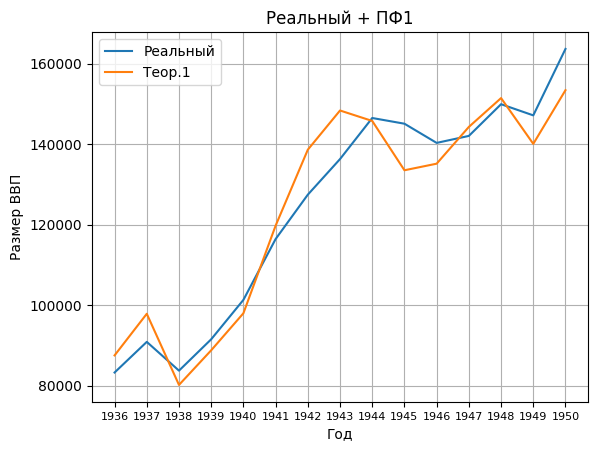

In [ ]:
plt.title("Реальный + ПФ1")
plt.xlabel("Год")
plt.xticks(df1.index.to_list(), fontsize = 8)
plt.ylabel("Размер ВВП")
plt.grid(True)
plt.plot(df.Y)
plt.plot(new_Y)
plt.legend(["Реальный", "Теор.1"])
plt.show()

**Задание 2**

Найдем коэффициенты для второй производственной функции (показатели степеней в сумме дают 1)

In [ ]:
df2 = df.copy()

# Вновь линеаризируем задачу через логарифм
df2["Ln(K/L)"] = np.log(df2.K / df2.L)
df2["Ln(Y/L)"] = np.log(df2.Y / df2.L)

# Составим систему уравнений на коэффициенты
summ = df2["Ln(K/L)"].sum()
matr = np.array([[M, summ], [M * summ, summ]])
vect = np.array([df2["Ln(Y/L)"].sum(), np.dot(df2["Ln(K/L)"], df2["Ln(Y/L)"]).sum()])

# Решим систему
answ1 = np.linalg.solve(matr, vect)
answ1[0] = np.exp(answ[0])

# Выведем найденные значения
print(f'A = {answ1[0]:.4f}, alpha = {answ1[1]:.4f}, beta = {1 - answ1[1]:.4f}')

# Зафиксируем новые значения ВВП, полученные через ПФ
new_Y1 = answ1[0] * (df2.K ** answ[1]) * (df2.L ** (1 - answ[1]))

A = 1.0001, alpha = 0.2880, beta = 0.7120


Отобразим теперь на одном графике динамику реального ВВП и обе полученные ПФ

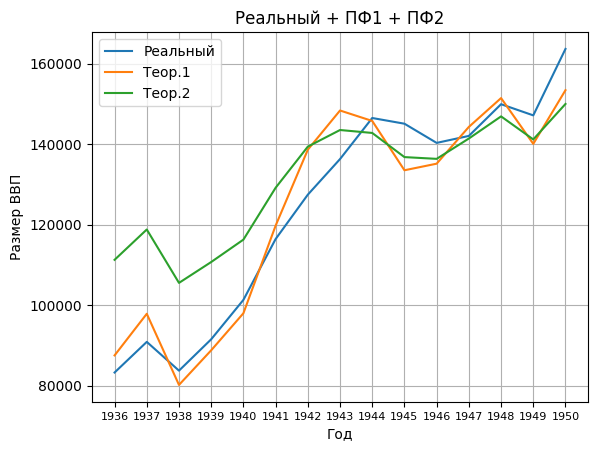

In [ ]:
plt.title("Реальный + ПФ1 + ПФ2")
plt.xlabel("Год")
plt.xticks(df1.index.to_list(), fontsize = 8)
plt.ylabel("Размер ВВП")
plt.grid(True)
plt.plot(df.Y)
plt.plot(new_Y)
plt.plot(new_Y1)
plt.legend(["Реальный", "Теор.1", "Теор.2"])
plt.show()

**Задание 3**

Теперь, используя первую ПФ отобразим три линии уровня

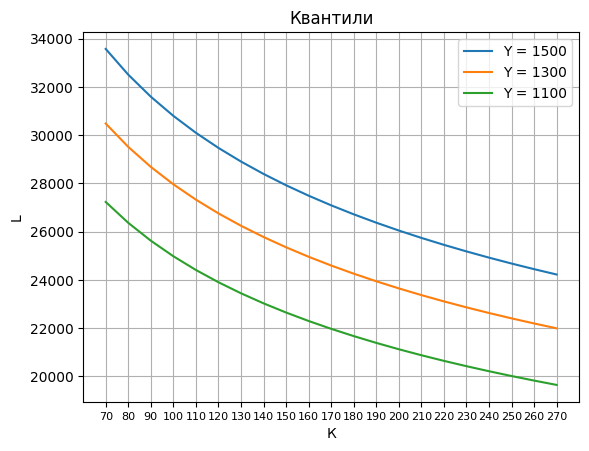

In [ ]:
# Зададим исходные значения для K
k = np.arange(70, 280, 10)

plt.title("Квантили")
plt.xlabel("К")
plt.xticks(np.arange(21), k, fontsize = 8)
plt.ylabel("L")
plt.grid(True)

# Рассчитаем показатели L для каждого K при заданном уровне ВВП
for y in range(1500, 900, -200):
  plt.plot((y/(answ[0] * (k ** answ[1]))) ** (1/answ[2]))

plt.legend(['Y = 1500', 'Y = 1300', 'Y = 1100'])
plt.show()